<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/T3/Janio_Souza_Lima_ML_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Aprendizado de Máquina - 2021/1**

* **Trabalho 03**
* **Professor**: Eduardo Bezerra
* **Aluno**: Janio de Souza Lima

##Preparação do ambiente

Importação de bibliotecas

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.io

Carga de arquivos para ambiente (apenas para uso deste notebook no Google Colab)

In [2]:
from google.colab import drive

In [3]:
#Conecta o Google Colab ao Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A etapa anterior apenas conecta ao seu Google Drive, após rodá-la e autenticar a sessão usando o link da API da Google, o código abaixo deve ser executado para apontar para o diretório de trabalho no qual estão gravados os códigos e bibliotecas personalziadas que serão usados na análise.

A pasta com os dados deve ser gravada neste mesmo diretório com o nome *data*, assim os trechos nos quais os conjuntos de dados são carregados rodarão sem problemas, mas sempre que possível os dados serão carregados diretamente do GitHub no repositório criado pelo professor da disciplina.

In [4]:
#Define o path dos códigos e dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/t3'
os.chdir(dir)

#1 Aprendizado de Comitês

##Análise preliminar dos dados

Carga e organização dos dados de treino e teste

---

Conjunto de dados analisado:

![dataset1](https://github.com/janiosl/python.ds/blob/master/ml/T3/data/dataset1.PNG?raw=true)

*Fonte: Tabela copiada de Eduardo Bezerra, enunciado desse trabalho (Trabalho 03).*

O conjunto de dados está dividido em dois arquivos. Um conjunto de treino com 1500 observações e um de testes com 577 observações. Para realização das análises dessa seção, quando necessário, o conjunto de originalmente separado para treino foi novamente dividido para uso como treino e validação na proporção de 80% para treino e 20% para validação.

In [5]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [6]:
#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Conferência dos primeiros registros do conjunto de dados
data_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [7]:
#Estatísticas descritivas do conjunto de treino
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [8]:
#Transoformação dos atributos e da classe alvo em matrizes
X_train_ = np.array(data_train.iloc[:, 0:11])
y_train_ = np.array(data_train['CLASSE'])

In [9]:
#Conferência dos primeiros registros dos atributos
X_train_[:5]

array([[   1,    0,  360,    0,  313,    9,   52,    0,   25,   48,    0],
       [   0,    0,  350,    1,  468,   10,   65,    0,   33,    6,    0],
       [   0,    0, 1100,    0,  829,    9,  125,    0,   56,   48,    0],
       [   0,    0, 3000,    0,  552,   12,   76,    1,   31,   60,    0],
       [   1,    0, 1000,    0,  809,   12,  111,    0,   24,    7,    0]])

In [10]:
#Conferência dos primeiros registros do classe alvo
y_train_[:5]

array([1, 1, 1, 1, 1])

In [11]:
#Conferência das dimensões das matrizes
print(X_train_.shape, y_train_.shape)

(1500, 11) (1500,)


In [12]:
#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Conferência dos primeiros registros do conjunto de dados
data_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


In [13]:
#Estatísticas descritivas do conjunto de treino
data_test.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.547660,0.110919,930.623917,0.452340,568.377816,8.402080,103.755633,0.112652,41.188908,29.270364,26.528596,0.469671
std,0.710706,0.511841,876.614452,0.498155,352.600280,3.633065,67.692428,0.316441,13.477631,50.100313,90.786052,0.499512
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,475.000000,0.000000,399.000000,6.000000,66.000000,0.000000,30.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,600.000000,0.000000,489.000000,10.000000,85.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1000.000000,1.000000,623.000000,10.000000,117.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,5.000000,9675.000000,1.000000,6000.000000,21.000000,719.000000,1.000000,70.000000,360.000000,1150.000000,1.000000


In [14]:
#Transoformação dos atributos e da classe alvo em matrizes
X_test = np.array(data_test.iloc[:, 0:11])
y_test = np.array(data_test['CLASSE'])

In [15]:
#Conferência das dimensões das matrizes
print(X_test.shape, y_test.shape)

(577, 11) (577,)


Divisão do conjunto originalmente criado como treinamento em novos subconjuntos para:
* Treino: 80% dos dados do arquivo `credtrain.txt`
* Validação: 20% dos dados do arquivo `credtrain.txt`

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_,
                                                  train_size=0.2,
                                                  random_state=31)

In [17]:
print(X_train.shape, y_train.shape,
      X_val.shape, y_val.shape)

(300, 11) (300,) (1200, 11) (1200,)


OBSERVAÇÃO: Usamos os nomes das variáveis da forma a seguir para distinguir a carga inicial do conjunto de treino e a separação acima, feita para permitir um processo mais adequado de treino, validação e teste em nossos fluxos de aprendizado de máquina.
* `X_train_` e `y_train_` => Referem-se ao **conjunto de dados de treino original**
* `X_train` e `y_train` => Referem-se ao **conjunto de dados de treino** equivalente a 80% do conjunto de treino original
* `X_val` e `y_val` => Referem-se ao **conjunto de dados de validação** equivalente a 80% do conjunto de treino original

##1.1 Boosting

O boosting visa aumentar a acurácia de modelos, pela combinação sequencial e iterativa de classificadores. Isso é feito considerando que dados $k$ classificadores, a iteração vai atualizando os pesos da classificação e usando os resultados para que o próximo classificador aprenda melhor com as falhas de classificação realizadas pelo anterior [Han, 2012].

**CRIAÇÃO E TREINAMENTO DOS MODELOS**

In [18]:
#Bibliotecas para criação dos indutores
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Nesta aplicação, está sendo usado o próprio AdaBoost como indutor, mas é importante ressaltar a possibilidade de uso da classe `AdaBoostClassifier` em conjunto com outros algoritmos. Para esta aplicação alternativa, o hiperparâmetro `base_estimator` deve receber o algoritmo deejado. Por exemplo, poderia ser adicionado `base_estimator=DecisionTreeClassifier(max_depth=2)` para que fosse realizado o treinamento de indutor usando classificadores de árvore de decisão.

Além disso, tanto para o AdaBoost quanto para o próximo modelo (Gradient Boosting) foram criados indutores sem aplicação de técnicas de sintonização de hiperparâmetros. Com essa alternativa, os modelos treinados usam os hiperparâmetros padrão de cada classificador.

* **AdaBoost**


Partindo da abordagem boosting o algoritmo AdaBoost - Adaptive Boosting, realiza a aplicação iterativa dos classificadores e de acordo com seu erro de classificação determina um peso para o voto de cada classificador. Por fim, para determinar a classificação final, diferentemente do que é feito no bagging cujos votos de todos classificadores tem peso igual, realiza a votação com pesos diferentes para cada classificador [Han, 2012].

In [19]:
#Criação do indutor AdaBoost sem alteração de hiperparâmetros
adaB_clf = AdaBoostClassifier()

In [20]:
#Treinamento do modelo
adaB_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

* **Gradient Boosting**

In [21]:
#Criação do indutor Gradient Boosting sem alteração de hiperparâmetros
gdB_clf = GradientBoostingClassifier()

In [22]:
#Treinamento do modelo
gdB_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**CURVA DE APRENDIZADO**

O trecho a seguir realiza o uso da função `learning_curve` da biblioteca Scikit-Learn para cálculos os dados para visualização da curva de aprendizagem dos modelos treinados nessa seção. Foi usado como pontuação a métrica acurácia, que demonstra o nível atingido por cada modelo à medida que são alteradas as quantidades de observações no conjunto de treinamento e validação.

In [23]:
#Biblioteca para cálculo da curva de aprendizado
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

A célula abaixo define os parâmetros da forma de separação do conjunto de validação e treino, seprando 20% para validação em cada iteração da curva de aprendizado

In [24]:
#Definição do critério de validação
#Escolha aleatória de 20% do conjunto para validação para cada iteração
cv = ShuffleSplit(test_size=0.2, random_state=31)

* **Curva de Aprendizado do Modelo AdaBoost**

In [25]:
#Aplicação da função para comparação dos resultados de validação e treino
_, acc_treino, acc_val = learning_curve(adaB_clf,
                                        X_train_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

In [26]:
#Cálculo dos scores baseado na média das rodadas
acc_tA = np.mean(acc_treino, axis=1)
acc_vA = np.mean(acc_val, axis=1)

* **Curva de Aprendizado do Modelo Gradient Boosting**

In [27]:
#Aplicação da função para comparação dos resultados de validação e treino
_, acc_treino, acc_val = learning_curve(adaB_clf,
                                        X_train_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

In [28]:
#Cálculo dos scores baseado na média das rodadas
acc_tG = np.mean(acc_treino, axis=1)
acc_vG = np.mean(acc_val, axis=1)

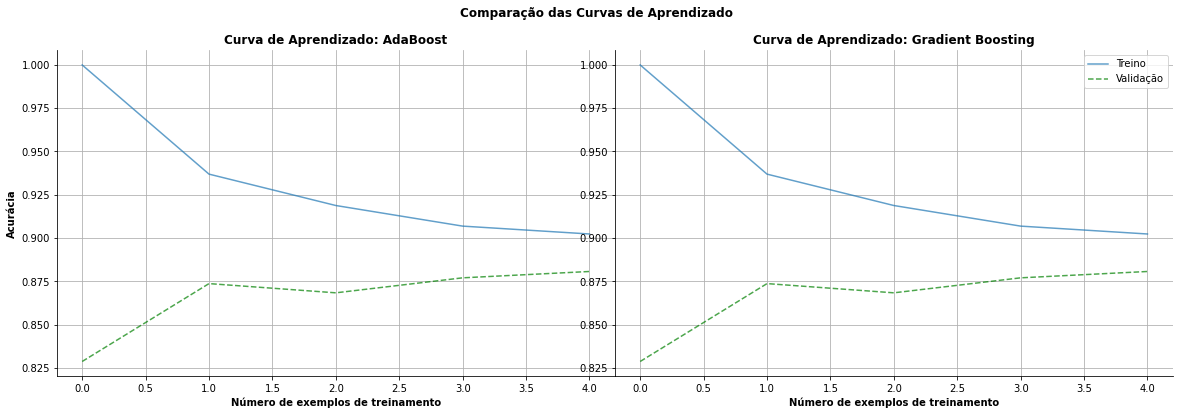

In [52]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação das Curvas de Aprendizado', fontweight='bold')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


#Curva de aprendizado AdaBoost
#=========================================
ax1.plot(acc_tA, alpha=0.7)         #Treino
ax1.plot(acc_vA, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax1.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax1.set_ylabel('Acurácia', fontweight='bold')
ax1.set_title('Curva de Aprendizado: AdaBoost', fontweight='bold')

#Grid acrescentado para facilitar a análise visual da curva
ax1.grid()


#Curva de aprendizado Gradient Boosting
#=========================================
ax2.plot(acc_tG, alpha=0.7)         #Treino
ax2.plot(acc_vG, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax2.legend(['Treino', 'Validação'], loc='upper right')
ax2.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax2.set_title('Curva de Aprendizado: Gradient Boosting', fontweight='bold')

#Grid acrescentado e aproximando os gráficos para facilitar a análise visual
ax2.grid()
plt.subplots_adjust(wspace=0)

#Ajustes visuais finais
#=========================================
sns.despine()
plt.savefig('target/plot1.1.png')

**PREDIÇÃO E AVALIAÇÃO DOS MODELOS**

Aplicação dos modelos para predição e avaliação do escore com o conjunto de testes.

In [30]:
#Biblioteca para geração do relatório de classificação de modelos
from sklearn.metrics import classification_report

In [31]:
#AdaBoost
#========================================
#Uso dos modelos para predição
y_pred_adaB = adaB_clf.predict(X_test)

#Visualização das primeiras observações da predição efetuada
y_pred_adaB[:5]

array([0, 1, 1, 1, 0])

In [32]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_adaB))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       306
           1       0.88      0.82      0.85       271

    accuracy                           0.86       577
   macro avg       0.87      0.86      0.86       577
weighted avg       0.87      0.86      0.86       577



In [33]:
#Gradient Boosting
#========================================
#Uso dos modelos para predição
y_pred_gdB = gdB_clf.predict(X_test)

#Visualização das primeiras observações da predição efetuada
y_pred_gdB[:5]

array([0, 1, 1, 1, 0])

In [34]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_gdB))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       306
           1       0.91      0.82      0.86       271

    accuracy                           0.88       577
   macro avg       0.88      0.87      0.87       577
weighted avg       0.88      0.88      0.87       577



Na avaliação final dos modelos no conjunto de testes, apesar da diferença não ser muito grande entre os modelos, o `Gradient Boosting` apresenta resultados ligeiramente superiores. Considerando a classe positiva, que indica que o cliente pagaria o crédito concedido, o segundo modelo consegue uma precisão de 0.91 contra 0.88 do `AdaBoost`. A situação se repete nas métricas de acurácia e F1, em que o modelo `Gradient Boosting` também apresenta resultados superiores, como pode ser visto nas saídas anteriores do relatório de classificação gerados com a função `classification_report`.

##1.2 Bagging

Esta abordagem visa usar o mesmo algoritmo e treiná-los diversas vezes com amostragens aleatórias do conjunto de treinamento.
* Bagging (Bootstrap aggregating): Realizar a amostragem com substituição.

As previsões são realizadas agregando previsões de todos os previsores treinados.

**CRIAÇÃO E TREINAMENTO DOS MODELOS**

* **Classificador Bagging baseado em k-NN**

In [35]:
#Bibliotecas para criação dos indutores
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#Prepração dos dados para correto funcionamento com o kNN
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

In [37]:
#Normalização dos dados
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)
X_val_norm = norm.fit_transform(X_val)

In [38]:
#Verificação do primeiro registro dos dados normalizados
X_train_norm[0]

array([-0.69652603, -0.23995691, -0.55588511, -0.78288136, -0.63954325,
        0.48186559, -0.68331454, -0.33947258, -0.41404433, -0.61178962,
       -0.41850915])

In [39]:
#Criação do indutor Bagging Classifier baseado no Knn

#Definição arbitrária do hiperparâmetro k
k = 15

#Criação do modelo
bgKNN_clf = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=k),
    bootstrap=True)

In [40]:
#Treinamento do modelo
bgKNN_clf.fit(X_train_norm, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=15, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

* **Classificador Bagging Random Forest**

Random Forests é um método ensemble learning baseado em Decision Trees, ou seja, o algoritmo é construído com base no treinamento de diversas árvores de decisão. [Han, 2012]

A imagem a seguir ilustra o conceito das múltiplas árvores sendo usadas:

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

Figura 1 - Ilustração de uma floresta aleatória ([Wikipedia](https://en.wikipedia.org/wiki/Random_forest))

In [41]:
#Criação do indutor bagging com o algoritmo RandomForestClassifier
"""
Exemplo
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)
"""
#Definição do nível de profundidade das árvores
md = 3
bgRndF_clf = RandomForestClassifier(max_depth=md)

In [42]:
#Treinamento do modelo
bgRndF_clf.fit(X_train_norm, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**CURVA DE APRENDIZADO DOS MODELOS**

In [43]:
#Normalização dos dados do conjunto original
X_train_norm_ = norm.fit_transform(X_train_)

In [44]:
#Bagging com kNN
#========================================================================

#Aplicação da função para comparação dos resultados de validação e treino
_, acc_treino, acc_val = learning_curve(bgKNN_clf,
                                        X_train_norm_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

#Cálculo dos scores baseado na média das rodadas
acc_tkNN = np.mean(acc_treino, axis=1)
acc_vkNN = np.mean(acc_val, axis=1)

In [45]:
#Bagging com Random Forest
#========================================================================

#Aplicação da função para comparação dos resultados de validação e treino
_, acc_treino, acc_val = learning_curve(bgRndF_clf,
                                        X_train_norm_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

#Cálculo dos scores baseado na média das rodadas
acc_tRndF = np.mean(acc_treino, axis=1)
acc_vRndF = np.mean(acc_val, axis=1)

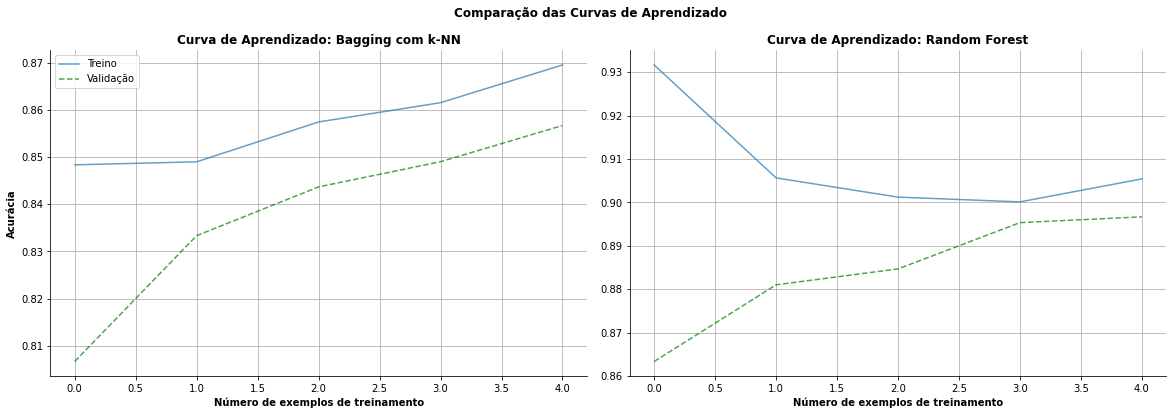

In [46]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação das Curvas de Aprendizado', fontweight='bold')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Curva de aprendizado Bagging com k-NN
#=========================================
ax1.plot(acc_tkNN, alpha=0.7)         #Treino
ax1.plot(acc_vkNN, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax1.legend(['Treino', 'Validação'], loc='upper left')
ax1.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax1.set_ylabel('Acurácia', fontweight='bold')
ax1.set_title('Curva de Aprendizado: Bagging com k-NN', fontweight='bold')
#Grid acrescentado para facilitar a análise visual da curva
ax1.grid()


#Curva de aprendizado Random Forest
#=========================================
ax2.plot(acc_tRndF, alpha=0.7)         #Treino
ax2.plot(acc_vRndF, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax2.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax2.set_title('Curva de Aprendizado: Random Forest', fontweight='bold')
#Grid acrescentado para facilitar a análise visual da curva
ax2.grid()


#Ajustes visuais finais
#=========================================
sns.despine()
plt.subplots_adjust(wspace=0.08)
plt.savefig('target/plot1.2.png')

**PREDIÇÃO E AVALIAÇÃO DOS MODELOS**

* **Classificador Bagging baseado em k-NN**

In [47]:
#Bagging baseado em k-NN
#=================================================

#Predição de valores com o modelo
y_pred_bgKNN = bgKNN_clf.predict(X_test_norm)

#Visualização dos primeiros registros previstos
y_pred_bgKNN[:5]

array([0, 0, 1, 1, 0])

In [48]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_bgKNN))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       306
           1       0.86      0.79      0.82       271

    accuracy                           0.84       577
   macro avg       0.84      0.84      0.84       577
weighted avg       0.84      0.84      0.84       577



* **Classificador Bagging Random Forest**

In [49]:
#Random Forest
#=================================================

#Predição de valores com o modelo
y_pred_bgRndF = bgRndF_clf.predict(X_test_norm)

#Visualização dos primeiros registros previstos
y_pred_bgRndF[:5]

array([0, 1, 1, 1, 0])

In [50]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_bgRndF))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       306
           1       0.89      0.82      0.85       271

    accuracy                           0.87       577
   macro avg       0.87      0.87      0.87       577
weighted avg       0.87      0.87      0.87       577



Diferentemente do que foi visto nos modelos avaliados na abordagem **boosting**, os modelos treinados e submetidos ao conjunto de validação nessa seção apresentaram resultados razoavelmente distintos na comparação da curva de aprendizado. Pelas métricas apresentadas no relatório de classificação das seções anteriores, pode-se observar esta análise detalhada. **O modelo *Random Forest* apresentou resultados superiores em todas as métricas avaliadas, o que levaria neste cenário à sua escolha como preditor na comparação dessa seção**.

#2 Sistemas de Recomendação

##2.1 Algoritmo de aprendizagem de filtragem colaborativa

###2.1.1 Função de custo da filtragem colaborativa

###2.1.2 Gradiente de filtragem colaborativa

##2.2 Aprendizado de Recomendações para Filmes

#3 Redes Neurais Artificiais

##3.1 Redes MLP

##3.2 Redes Convolucionais

#Referências

**Referências**

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) Data Mining: Concepts and techniques. Morgan Kaufmann, 3rd Edition.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

---

**Algoritmos e conjuntos de dados:**

* Bibliotecas personalizadas e conjuntos de dados usados na análise: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t3
* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T1
* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T2
* Métodos de aprendizado por comitê: https://github.com/janiosl/python.ds/tree/master/ml/ensemble
* Florestas Aleatórias: https://github.com/janiosl/python.ds/tree/master/ml/randomForest
* Métodos de aprendizado de comitê e florestas aleatórias: https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
* k-NN: https://github.com/janiosl/python.ds/tree/master/ml/knn
* Métodos de sistemas recomendadores: https://github.com/janiosl/python.ds/tree/master/ml/recommender
* Cálculo da curva de aprendizagem: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
* Definição da estratégia de separação dos conjuntos de treino e validação no cálculo da curva de aprendizagem: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit